# Problem Set 1 


## Question 1: Sea level from seismic reflection
Interpret sea level change from the seismic reflection profile shown below. The figure shows you a real seismic reflection profile (top panel), which has been interpreted (bottom panel) and specific layers have been dated (thick layers with numbers, ages are in Ma). You may use the interpreted version (lower panel) for your analysis. Left is the oceanward side and right is the landward side.

#### a) Mark the clinoform rollover position for layers where it is clearly identifiable with a dot or circle.

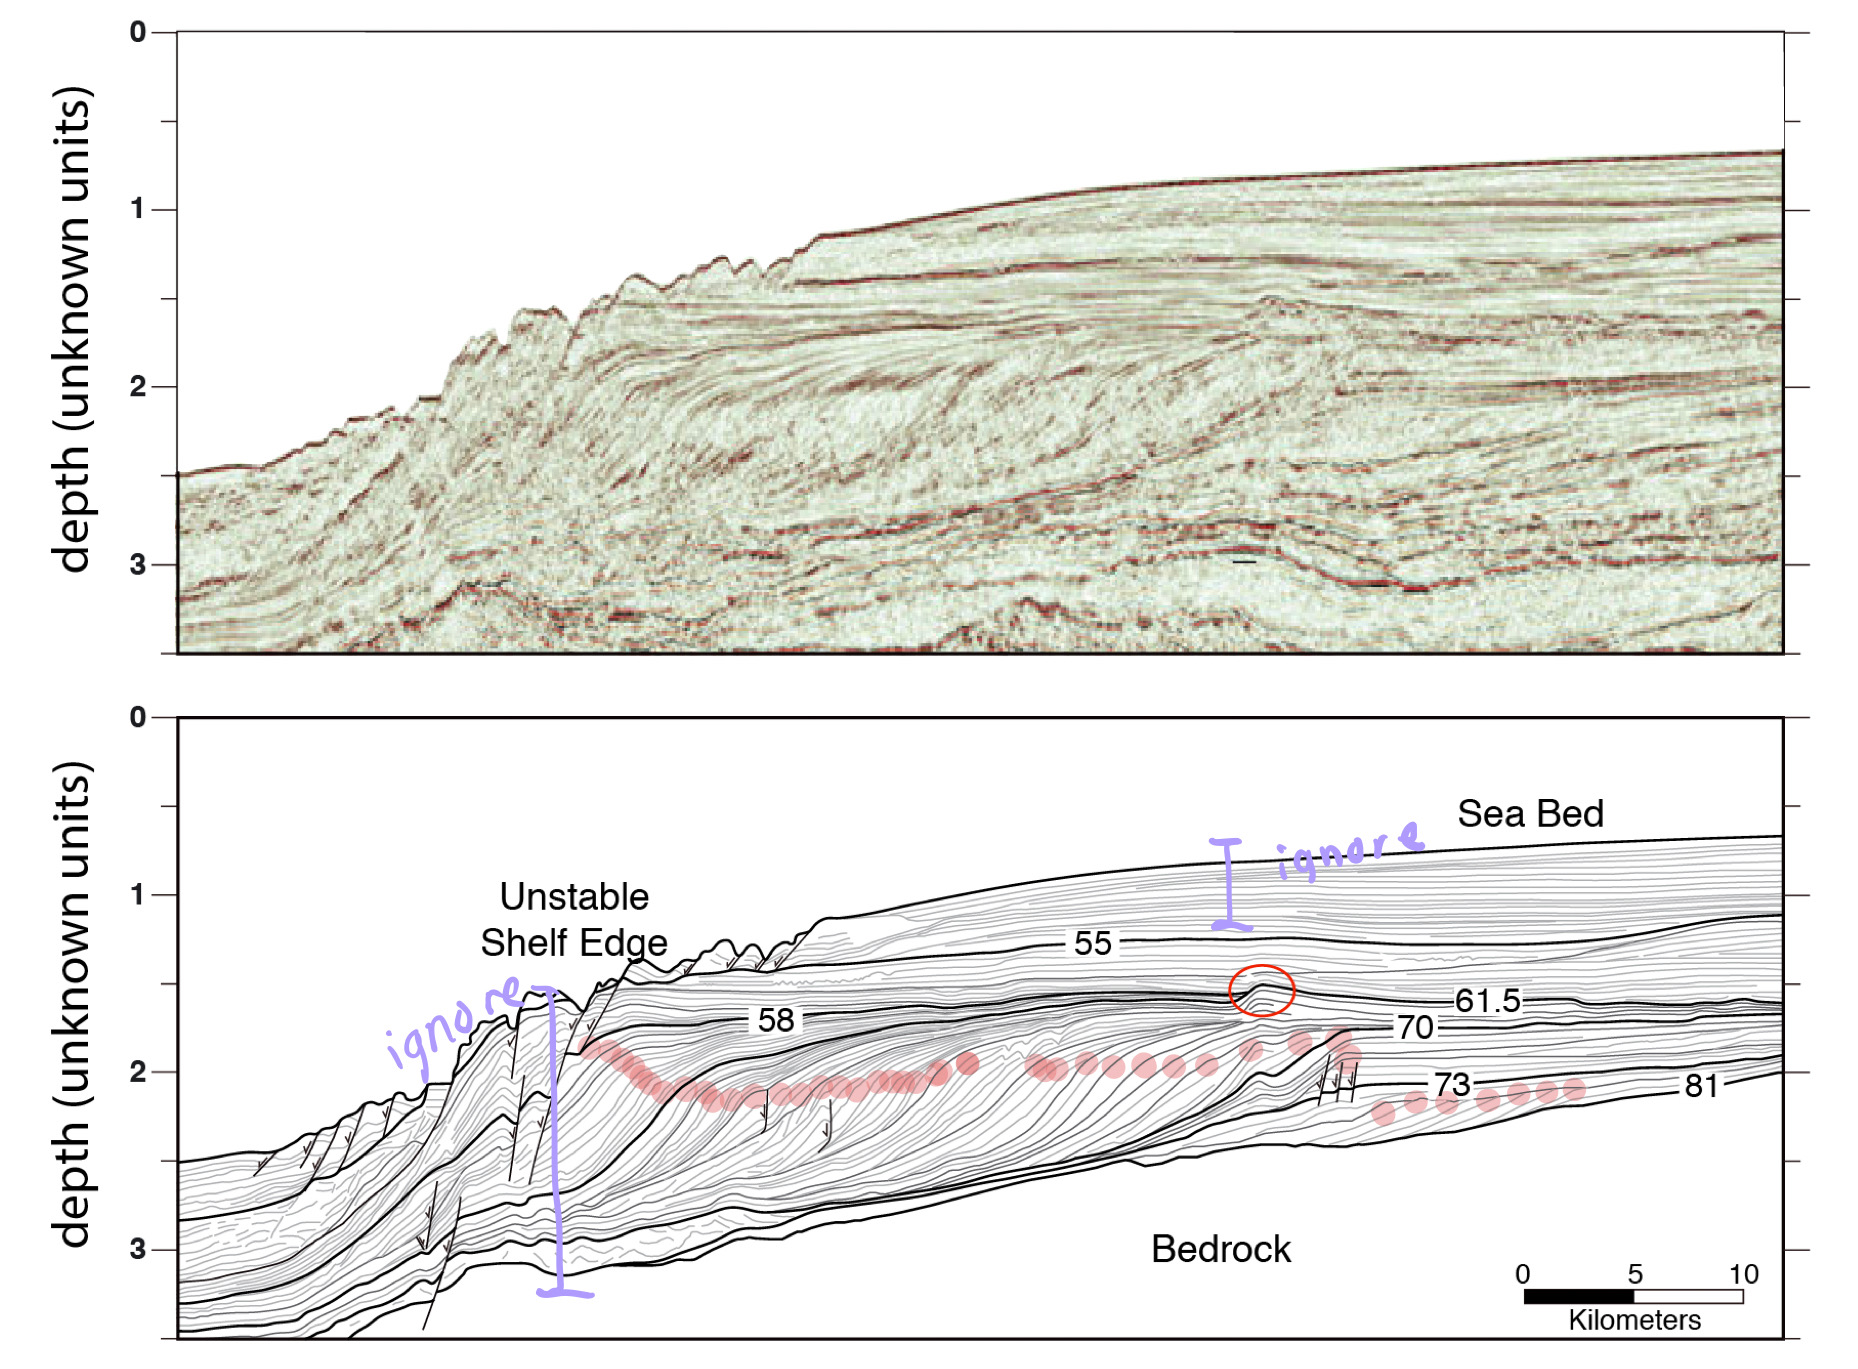

#### b) For each time interval describe whether you identify progradation / degradation / aggradation / retrogradation (or a combination of them).

81-73: progradation then degradation then aggradation

73-70: aggradation

70-61.5: progradation + aggradation

61.5-58: slight progradation + mostly aggradation

58-55: progradation + aggradation

#### c) Use your results from a) to describe how local sea level has qualitatively changed from 81 Ma to 55 Ma and provide explanations for your sea level interpretation.

From 81 - 73 Ma we have a static sea level (causing degradation on the clinoform rollover) and then a slight rise that causes aggradation. From 73 - 70 Ma, we see a sea level rise, producing aggradation of sediments. Then from 70-61.5 Ma, we have progradation and aggradation, indicating a slower sea level rise with a very high sediment flux. Then from 61.5-58 Ma, we see slight progradation with aggradation indicating a sea level rise. Then from 58-55 Ma, we see a sea level increase with a low sediment flux, causing sediment beds to accumulate stacked one on top of the other without any progradation. 

#### d) Is this an area with generally high sediment input or not?

Yes, this is definitely an area with high sediment input. We can tell that by the near constant progradation and aggradation over time. To my eye, I don't see any moment where we have low sediment input and there is retrogradation. If the system was sediment starved we would not see any progradation outwards. 

## Question 2: Hypsometry and continental flooding
Investigate differential sea level change in Australia between the North and the South using hypsometry:

#### a) Produce a hypsometric curve for Australia. 
To do this load the provided topography grid (etopo_ice_15.mat or etopo_ice_15.mat, whichever format you prefer) and isolate Australia. Since Australia is relatively close to the equator you may assume that a lat-lon projection is equal area. Calculate the cumulative amount of area per elevation (i.e. hypsometric curve), starting at elevation -200m to the highest elevation present. Present two plots, one showing the topographic map isolating Australia that you’re using and the other being the hypsometric curve. In addition to the plots, please submit your code that you use to calculate the hypsometric curve. 

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

from scipy.interpolate import griddata
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from matplotlib import path

from matplotlib import colorbar as colorbar
import cmocean

In [3]:
etopo = np.load('etopo_ice_15.npy')

In [ ]:
##This is one way ... better for irregularly space data
print('linear interpolation ...')
lon = np.arange(etopo[:,0].min(),etopo[:,0].max()+1,0.5)
lat = np.arange(etopo[:,1].min(),etopo[:,1].max()+1,0.5)
lon2,lat2 = np.meshgrid(lon,lat)
topo2 = griddata((etopo[:,0],etopo[:,1]),etopo[:,2],(lon2, lat2), method='linear')

In [8]:
#australia polygon
p = path.Path([(112.3,-17.4), (130.35,-10.13), (142.8,-9.96), (156.2,-25.1), 
               (148,-44.95), (131.24,-35.9), (114.6,-35.6), (111.4,-21)])

tmp = np.array((etopo[:,0],etopo[:,1])).T
tmp

array([[ 1.2000e-01, -8.9880e+01],
       [ 1.2000e-01, -8.9620e+01],
       [ 1.2000e-01, -8.9380e+01],
       ...,
       [ 3.5988e+02,  8.9380e+01],
       [ 3.5988e+02,  8.9620e+01],
       [ 3.5988e+02,  8.9880e+01]])

In [9]:
mask = p.contains_points(tmp)
print(mask)
print(mask.shape)

[False False False ... False False False]
(1036800,)


In [10]:
# set points outside of aus as nans
etopo[~mask,2] = np.nan

# get the number of unique elements in etopo 
num1 = np.unique(etopo[:,0]).size
num2 = np.unique(etopo[:,1]).size

#transpose
lon2 = np.reshape(etopo[:,0],(num1,num2)).T
lat2 = np.reshape(etopo[:,1],(num1,num2)).T
topo2 = np.reshape(etopo[:,2],(num1,num2)).T

In [11]:
nume = etopo[~np.isnan(etopo[:,2]),2].size

aboveneg100 = etopo[etopo[:,2] >= -100,2].size
aboveneg50 = etopo[etopo[:,2] >= -50,2].size
above0 = etopo[etopo[:,2] >= 0.0,2].size
above20 = etopo[etopo[:,2] >= 20.0,2].size
above50 = etopo[etopo[:,2] >= 50.0,2].size

print("Percent above -100 m: ",(100*aboveneg100/nume))
print("Percent above -50 m: ",(100*aboveneg50/nume))
print("Percent above 0 m: ",(100*above0/nume))
print("Percent above 20 m: ",(100*above20/nume))
print("Percent above 50 m: ",(100*above50/nume))

Percent above -100 m:  83.21541839473042
Percent above -50 m:  79.25103683825323
Percent above 0 m:  67.91290558672847
Percent above 20 m:  65.65625762381069
Percent above 50 m:  62.112710417174924


In [12]:
llat = p.vertices[:,1].min()-1
ulat = p.vertices[:,1].max()+1
llon = p.vertices[:,0].min()-1
ulon = p.vertices[:,0].max()+1

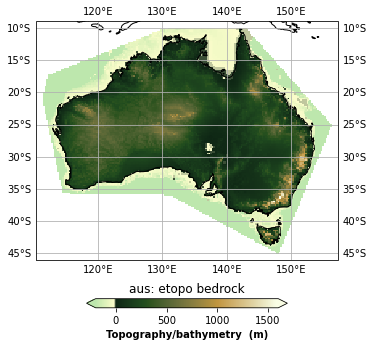

In [14]:
#Set the figure window size
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 1, 1,projection=ccrs.PlateCarree())
cmap = cmocean.cm.topo
cmap1 =  cmocean.tools.crop(cmap, vmin= -200, vmax = 1600, pivot = 0)

# set the extent
ax.set_extent([llon, ulon, llat, ulat], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Add data
pc = ax.pcolormesh(lon2,
                   lat2,
                   topo2,
                   vmin = -200,
                   vmax = 1600,
                   cmap = cmap1, 
                   transform=ccrs.PlateCarree())

#Set colormap parameters
cax,kw = colorbar.make_axes(ax,
                            location='bottom',
                            pad=0.12,
                            shrink=0.3,)
cb=fig.colorbar(pc,cax=cax,extend='both',**kw)
cb.set_label('Topography/bathymetry  (m)',size=10, weight='bold')

plt.title('aus: etopo bedrock');

#### b) Now we will compare hypsometry in the northern part of the island versus the southern part. 
First, remove areas that have undergone recent volcanism and basin formation. To do that you can remove areas east of 135oE in your analysis.

In [17]:
type(p)

matplotlib.path.Path

TypeError: '>' not supported between instances of 'Path' and 'int'

Next produce a hypsometric curve for the northern part (you may choose this to be north of 25oS) and the southern part (you may choose this to be south of 25oS). 

Present again two plots, one showing the topographic map isolating the northern and southern region that you’re using (could be two separate plots) and the other being the hypsometric curves for each region.

#### c) Assuming 30% of the northern and southern part of the continent from b) (including shelves down to -200m) was flooded during the Miocene.
At what elevation would you find the Miocene paleo shoreline today? What does that tell you about the relative motion between the northern and the southern part of the continent?

## Question 3: Mid-ocean ridge spreading rate changes and sea level change
Calculate the amount of sea level rise during faster mid ocean ridge spreading. Consider a 2D transect through an ocean basin (see figure below) that stores 20,000 km2 of water

Mantle temperature 1300oC, 
ocean bottom temperature 10oC, 
thermal diffusivity 10-6 m2/s, 
thermal expansivity 3x10 1/K,
densityofwater 1000kg/m
densityofsublithosphericmantle 3000kg/m

#### a) What is H0 if we assume a half-spreading rate of 5cm/yr. 
You can use the values for constants listed below. Show the equations you are using – if you use pen and paper feel free to submit a photo of it or use a phone app like ‘Tiny Scanner’ to scan it.

In [57]:
# mantle temp (in kelvin)
Tm = 1573.15
# surface (ocean bottom) temp (in kelvin)
Ts = 283.15
# thermal diffusivity
k = 1e-6
# thermanl expansivity 
alpha = 3e-5
# density of water
d_wat = 1000
# density of mantle 
d_mant = 3000 

# distance from ridge
x = 2500

In [58]:
# half spreading rate - 5 cm/yr then we have to convert from cm/yr to km/yr to match
u_cm = 5
u = (5/100)/100
u

0.0005

In [59]:
top = 2*d_mant*alpha*(Ts-Tm)*np.sqrt(k/(u*np.pi))
bottom = d_wat-d_mant
W = (top/bottom)*np.sqrt(x)
W
print(f'the water depth below the ridge is {W} km or {W*1000} meters')

the water depth below the ridge is 0.14646784290327028 km or 146.46784290327028 meters


In [56]:
(20000 / (2*2500)) + W

4.14646784290327

#### b) Assume an increase in half-spreading rate (dashed black and blue lines) to 7cm/yr.
Determine H1 and DH. Show your work.

In [ ]:
u_7 = 0.0007

#### c) The figure below assumes passive margins, i.e. no subduction of the oceanic crust underneath the continents to the side. 
Could the presence of subduction zones affect DH and if so, would it lead to a decrease or increase in DH?